**Name:** Tushar Uttam Suroshe

**Roll No:** RBT21CB046


**Title:** Naive Bayes Classification implementation on Sms Spam Detection

**Aim:** The aim of this section is to perform spam detection using the Naive Bayes classification algorithm.

Step 1: Importing Libraries and Loading Data
The code starts by importing necessary libraries and loads a dataset from a CSV file named 'spam.csv.' It also removes unnecessary columns and renames the columns for clarity.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)

,v1,v2
2201,ham,A boy was late 2 home. His father: \POWER OF F...
3218,ham,Me too baby! I promise to treat you well! I be...
263,spam,Hey I am really horny want to chat or see me n...
2062,ham,Is there any training tomorrow?
1776,spam,Call FREEPHONE 0800 542 0578 now!


In [ ]:
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)

In [ ]:
df.sample(5)

,message_type,message
603,ham,Be happy there. I will come after noon
1905,ham,"There're some people by mu, I'm at the table b..."
4509,ham,This weekend is fine (an excuse not to do too ...
2515,ham,Bognor it is! Should be splendid at this time ...
4022,ham,Well. Balls. Time to make calls


Step 2: Label Encoding of Message Types
Label encoding is applied to the 'message_type' column, where 'spam' is encoded as 1 and 'ham' as 0.

In [ ]:
encoder =LabelEncoder()

df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


Step 3: Data Exploration and Visualization
This part of the code examines the dataset for missing values and duplicates, then visualizes the distribution of message types using a pie chart.

In [ ]:
df.isnull().sum()
df.duplicated().sum()

403

In [ ]:
df= df.drop_duplicates()

In [ ]:
df['message_type'].value_counts()

0    4516
1     653
Name: message_type, dtype: int64

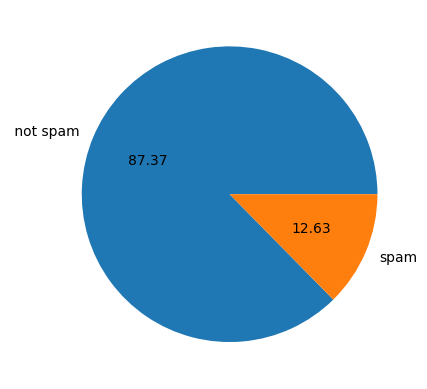

In [ ]:
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

Step 4: Natural Language Processing (NLP) Preprocessing
The code calculates the number of characters, words, and sentences in each message using the NLTK library.

In [ ]:
#natural language tool kit
import nltk
nltk.download('punkt')

df['num_characters']=df['message'].apply(len)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Step 5: Data Visualization of Message Length
Histograms are plotted to compare the distribution of message lengths (characters and words) for spam and non-spam messages.

In [ ]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
3829,0,I agree. So i can stop thinkin about ipad. Can...,86,20
5275,0,Oh yeah clearly it's my fault,29,7
3114,0,I wait 4 Ì_ inside da car park...,33,9
2152,0,Hi kindly give us back our documents which we ...,77,14
3655,0,Oh really?? Did you make it on air? What's you...,55,16


In [ ]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

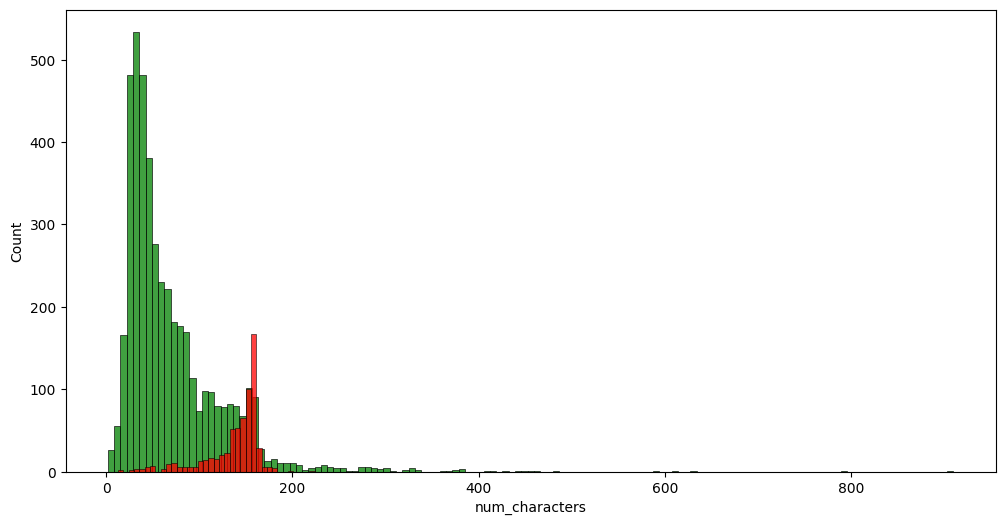

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

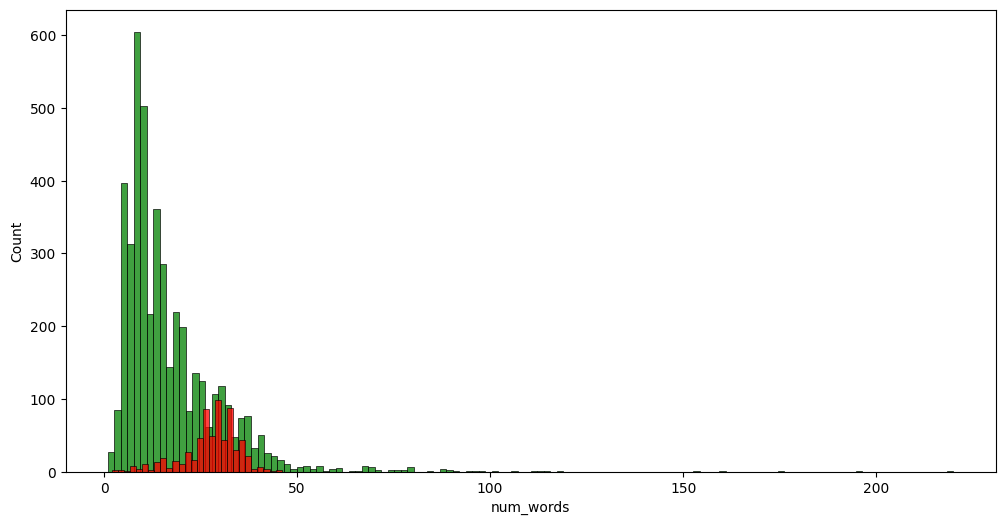

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

Step 6: Text Transformation and Feature Extraction
This step defines a function text_transform for text preprocessing, which removes stop words, punctuation, and applies stemming to the text data. It then applies this transformation to the 'message' column.

In [ ]:
def text_transform(message):
    message=message.lower()
    message=nltk.word_tokenize(message)

    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)

Step 7: TF-IDF Vectorization
TF-IDF vectorization is applied to convert the preprocessed text data into numerical features (X) for machine learning. The target labels (y) are also prepared.

In [ ]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['transformed_msg']=df['message'].apply(text_transform)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Step 8: Data Splitting and Model Training (Naive Bayes)
The dataset is split into training and testing sets, and a Gaussian Naive Bayes classifier is trained on the TF-IDF transformed features. The code then evaluates the model's accuracy, confusion matrix, and precision score.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))


Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


Conclusion: In this code, a machine learning model is developed to classify text messages as either spam or non-spam (ham). The process includes data preparation, NLP-based text analysis, feature extraction, and model training using a Gaussian Naive Bayes classifier. The model's performance is evaluated through metrics such as accuracy, precision, and confusion matrix. This code demonstrates a full text classification workflow, which can be applied to tasks like spam sms filtering.